In [ ]:
## Set file date for use. As of October, this is Oct152018
filedate = 'Oct152018'

In [1]:
## bring in needed mods
import pandas as pd

In [2]:
## set path to phenotype data, should in in the words, "curation_baselined_median21_AUC_Xstrain.csv'
data_path = '../FILES/Tecan_qtlruns_%s_curated_baselined_median21_AUC_Xstrain_noclone.csv'%(filedate)

In [3]:
## Bring in phenotype data
phenodf = pd.read_csv(data_path,index_col=0)

In [4]:
## View the first few rows
phenodf.head()

,temp,amphB,median_AUC
strain,,,
SS-A837,30,0.0,72.846625
SS-B307,30,0.0,41.784875
SS-B310,30,0.0,42.578175
SS-B311,30,0.0,51.629500
SS-B312,30,0.0,34.049937


In [5]:
## Set genotype path
geno_path = '../FILES/CDx-ill-SNP-df-104-blocked.csv'

In [6]:
## Bring in genotype data
bgeno = pd.read_csv(geno_path,index_col=0)

In [7]:
## Check shape
bgeno.shape

(2777, 114)

In [8]:
## set path to file, should in in the words, "curation_baselined_median21_AUC_Xstrain_pvalues_combinded.csv'
file_path = '../FILES/Tecan_qtlruns_%s_curated_baselined_median21_AUC_Xstrain_pvalues_combined.csv'%(filedate)

In [9]:
## Bring in pvalue data
pvaldf = pd.read_csv(file_path,index_col=0)

In [10]:
## Check shape
pvaldf.shape

(2777, 20)

In [11]:
## View the first few ros
pvaldf.head()

,Oldix,Vcfix_v,Pos_v,Cumpos_v,Vcfix_w,Pos_w,Cum_pos_w,AF,is_ref,Chrom,30C_0.0,30C_0.075,30C_0.125,30C_0.175,37C_0.0,37C_0.075,37C_0.125,37C_0.175,39C_0.0,EBM
0,289,289,5016,5016,1396,35290,35290,0.442308,0,Chr01,1.518794,0.482190,0.928990,0.655625,0.170498,0.084123,0.521301,0.050278,0.004560,0.467247
1,1398,1398,35512,35512,1426,36280,36280,0.432692,0,Chr01,1.022419,0.447783,1.346480,1.182307,0.024533,0.034230,0.406838,0.026939,0.200904,0.511887
2,1429,1429,36364,36364,1432,36427,36427,0.471154,0,Chr01,0.587465,0.472639,1.284711,1.175340,0.258632,0.228339,0.727523,0.161910,0.329956,0.600684
3,1438,1438,36573,36573,1440,36618,36618,0.451923,0,Chr01,0.361419,0.627389,1.604478,1.371012,0.372991,0.252712,0.761305,0.144492,0.369120,0.710508
4,1447,1447,36769,36769,1457,36882,36882,0.461538,0,Chr01,0.324940,0.647430,1.517092,1.343837,0.509959,0.484078,0.884918,0.233675,0.600102,0.831435


In [12]:
## Combine data for easy of searching
combdf = pd.concat([pvaldf,bgeno],axis=1)

In [13]:
## Check its shape
combdf.shape

(2777, 134)

In [14]:
## Take unique columns
uniq_cols = combdf.columns.unique().tolist()

In [15]:
## Check length
len(uniq_cols)

124

In [16]:
## Drop the duplicate columns
cdf = combdf.T.drop_duplicates().T

In [17]:
## check shape
cdf.shape

(2777, 123)

In [18]:
## Gather the sample names
segs = [a for a in cdf.columns.tolist() if len(a.split('S-'))==2]

In [19]:
## CHeck how many
len(segs)

102

In [20]:
## Looks like the XL280s where dropped
for a in ['SS-B830','SS-A853']:
    if a in segs:
        print 'yes'

In [21]:
## Add them back 
cdf[['SS-B830','SS-A853']] = bgeno[['SS-B830','SS-A853']]

In [22]:
## check df shape
cdf.shape

(2777, 125)

In [23]:
## Rename the strains here to match those phenotyped by DM
cdf_ncols = []
for s in cdf.columns.tolist():
    if len(s.split('S-')) == 2:
        if len(s.split('_Cor')) > 1:
            cdf_ncols.append(s.split('_Cor')[0]+'_cor')
        elif s in ['SS-A853']:
            cdf_ncols.append('XL280alpha')
        elif s in ['SS-B830']:
            cdf_ncols.append('XL280a')
        else:
            cdf_ncols.append(s)
    else:
        cdf_ncols.append(s)

In [24]:
## Attach new names
cdf.columns = cdf_ncols

In [25]:
## CHeck first few rows.
cdf.head()

,Oldix,Vcfix_v,Pos_v,Cumpos_v,Vcfix_w,Pos_w,Cum_pos_w,AF,is_ref,Chrom,...,SS-C033,SS-C036,SS-C039,SS-C242,SS-C271,SS-C272,SS-C290,SS-C291,XL280a,XL280alpha
0,289,289,5016,5016,1396,35290,35290,0.442308,0,Chr01,...,1,0,1,0,0,0,1,0,0.0,0.0
1,1398,1398,35512,35512,1426,36280,36280,0.432692,0,Chr01,...,1,0,1,0,0,0,1,0,0.0,0.0
2,1429,1429,36364,36364,1432,36427,36427,0.471154,0,Chr01,...,1,0,1,0,0,0,1,0,0.0,0.0
3,1438,1438,36573,36573,1440,36618,36618,0.451923,0,Chr01,...,0,0,0,0,0,0,1,0,0.0,0.0
4,1447,1447,36769,36769,1457,36882,36882,0.461538,0,Chr01,...,0,0,0,0,0,0,1,0,0.0,0.0


In [26]:
## Set save path for this combined dataframe
to_save_cdf = file_path.split('.csv')[0] + '_haplotypes.csv'

In [27]:
## Save dataframe
cdf.to_csv(to_save_cdf)

In [28]:
## Check pheontype data of parental strain SS-A837
phenodf.loc['SS-A837']

,temp,amphB,median_AUC
strain,,,
SS-A837,30,0.000,72.846625
SS-A837,30,0.075,6.400875
SS-A837,30,0.125,1.578125
SS-A837,30,0.175,2.056125
SS-A837,37,0.000,60.492750
SS-A837,37,0.075,39.584125
SS-A837,37,0.125,8.387125
SS-A837,37,0.175,0.469125
SS-A837,39,0.000,18.756750


In [29]:
## Gather strains from phenotype data
pheno_strains = phenodf.index.unique()

In [30]:
## Check the lenght of these strains
len(pheno_strains)

104

In [31]:
## Check they map to genotype data
assert cdf[pheno_strains].shape[1] == len(pheno_strains)

In [32]:
## Analysis of chromosome 2 qtl, take the max
maxQTLc2y = cdf[(cdf.Chrom=='Chr02')]['EBM'].max()

In [33]:
## analysis of chrom 2 qtl, find the max
maxQTLc2ix = cdf[(cdf.Chrom=='Chr02')]['EBM'].sort_values().index.tolist()[-1]

In [34]:
## analysis of chrom 2 qtl, check work
assert maxQTLc2y == cdf.loc[maxQTLc2ix,'EBM']

In [35]:
## Gather unique pheontype names from our combined dataframe
phenos = [ a for a in cdf.columns.tolist() if len(a.split('C_0.')) == 2]

In [36]:
## Check work
assert len(phenos) == phenodf[['temp','amphB']].drop_duplicates().shape[0]

In [37]:
## Examine phenotypes
phenos

['30C_0.0',
 '30C_0.075',
 '30C_0.125',
 '30C_0.175',
 '37C_0.0',
 '37C_0.075',
 '37C_0.125',
 '37C_0.175',
 '39C_0.0']

In [38]:
## Gather the genotypes at the max QTL on chrome 2
maxQTLc2g = cdf.loc[maxQTLc2ix,pheno_strains]

In [39]:
## Bring in needed mods
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('tableau-colorblind10')

In [40]:
## Make a dataframe with the genotypes at the max QTL on chrom 2 and phenotype data at 37C, 0.125 ug
maxQTLc2df = pd.DataFrame([maxQTLc2g,phenodf[(phenodf.temp==37)
                                             &(phenodf.amphB==0.125)]['median_AUC']]).T

In [41]:
## Bring in needed mod
import numpy as np

In [42]:
## Make a set point to plot with seaborn
maxQTLc2df['Set'] = np.ones(maxQTLc2df.shape[0])

In [43]:
## Make allele map, recall zero == xl280, 1 == SS-A837
alleles = ['XL280','431'] 

In [44]:
## Map the integer allele values to strings
maxQTLc2df['Allele'] = [ alleles[int(a)] for a in maxQTLc2df[maxQTLc2ix].tolist() ]

In [45]:
## Bring in needed mods
import seaborn as sns
sns.set(font_scale=1)

In [46]:
maxQTLc2df.head()

,471,median_AUC,Set,Allele
strain,,,,
SS-A837,1.0,8.387125,1.0,431
SS-B307,0.0,2.398550,1.0,XL280
SS-B310,1.0,0.650000,1.0,431
SS-B311,0.0,18.933625,1.0,XL280
SS-B312,0.0,5.445300,1.0,XL280


In [47]:
## Set save path and save var
figsave_switch = False
figsavepath = '../FIGURES'+data_path.split('FILES')[-1].split('.csv')[0]+'_AUC_QTL_2.png'

In [49]:
## Set random seed
np.random.seed(71191)

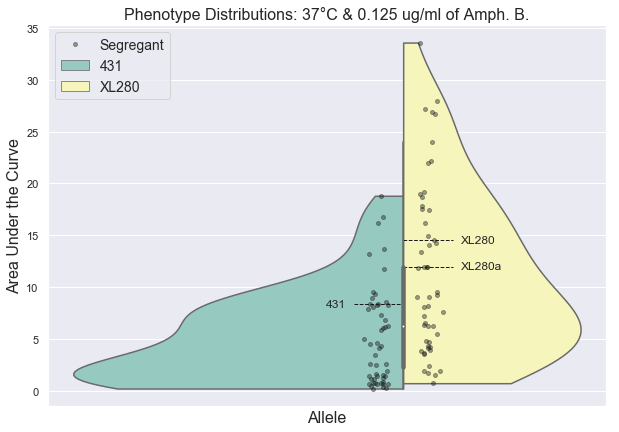

In [50]:
fig, ax = plt.subplots(1,1,figsize=(10,7));
## Plot AUC distributions by allele
sns.violinplot(x='Set',y = 'median_AUC',
               data=maxQTLc2df,orient='vertical',hue='Allele',
               split=True,cut=0,palette="Set3",ax=ax);
plt.xticks([1],' ');
plt.xlabel('Allele',fontsize=16);
plt.ylabel('Area Under the Curve',fontsize=16);

## Plot parental strains
plt.hlines(maxQTLc2df.loc['SS-A837','median_AUC'],
           -0.06,0,linestyles='--',linewidth=1);
plt.hlines(maxQTLc2df.loc['XL280alpha','median_AUC'],
           0,0.06,linestyles='--',linewidth=1);
plt.hlines(maxQTLc2df.loc['XL280a','median_AUC'],
           0,0.06,linestyles='--',linewidth=1);

## Plot segregants
allele_a = maxQTLc2df[(maxQTLc2df.Allele=='431')]['median_AUC'].values
allele_b = maxQTLc2df[(maxQTLc2df.Allele=='XL280')]['median_AUC'].values
plt.plot(-0.03+np.random.normal(0,0.008,len(allele_a)),allele_a,'ko',ms=4,alpha=0.4)
plt.plot(0.03+np.random.normal(0,0.008,len(allele_b)),allele_b,'ko',
         ms=4,label='Segregant',alpha=0.4);

## add labels and legend
plt.text(-0.07,maxQTLc2df.loc['SS-A837','median_AUC'],'431',va='center',ha='right')
plt.text(0.07,maxQTLc2df.loc['XL280a','median_AUC'],
         'XL280a',va='center',ha='left')
plt.text(0.07,maxQTLc2df.loc['XL280alpha','median_AUC'],
         'XL280',va='center',ha='left');
plt.legend(loc='upper left',fontsize=14);
plt.title(u'Phenotype Distributions: 37°C & 0.125 ug/ml of Amph. B.',fontsize=16)

## Save
if figsave_switch:
    fig.savefig(figsavepath,dpi=150,bbox_inches='tight')